# Dealing with missing values
The theoretical concepts can be read read through this [Link](https://codanics.com/books/abc-of-statistics-for-data-science/Chapter6.html#missing-values).

In [48]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [32]:
# import data
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


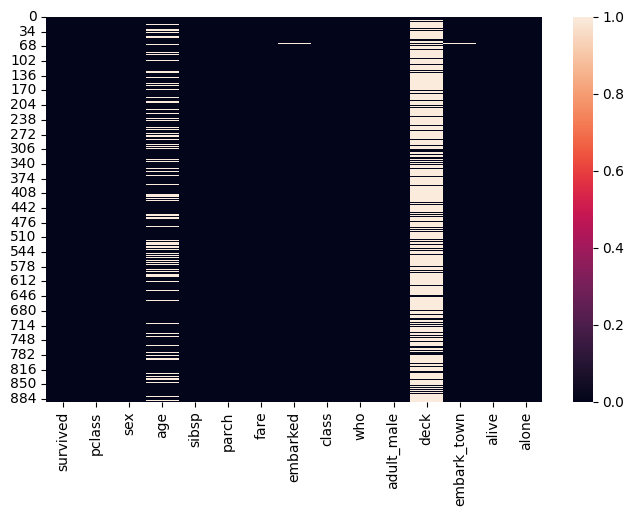

In [33]:
# vistualize the data
plt.figure(figsize=(8,5))
sns.heatmap(df.isnull())
plt.show()

*Insight:* The white spaces shows the missing values in `age`,`deck`,`embarked` and `embark_town`.

## 2nd Way pf finding missing values

In [34]:
print("-----Missing Values in Ascending Order-----")
print(df.isnull().sum().sort_values(ascending=True))
print("-----Missing Values in Descending Order-----")
print(df.isnull().sum().sort_values(ascending=False))

-----Missing Values in Ascending Order-----
survived         0
pclass           0
sex              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
embarked         2
embark_town      2
age            177
deck           688
dtype: int64
-----Missing Values in Descending Order-----
deck           688
age            177
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64


### We can also see the perccentage of missing values

In [35]:
(df.isnull().sum()/len(df)*100).sort_values(ascending=False).round(3)

deck           77.217
age            19.865
embarked        0.224
embark_town     0.224
survived        0.000
pclass          0.000
sex             0.000
sibsp           0.000
parch           0.000
fare            0.000
class           0.000
who             0.000
adult_male      0.000
alive           0.000
alone           0.000
dtype: float64

# Filling Missing Values
- filling the missing values of `age` with average/mean of age

In [36]:
df['age']=df['age'].fillna(df['age'].mean()) 

Now, we have `77%` missing values in deck, so we'll drop this column.

In [38]:
df.drop('deck',axis=1,inplace=True)

As `embarked` and `embark_town`, both columns are categorical. So, we'll fill missing values with mode.


In [41]:
df['embark_town']=df['embark_town'].fillna(df['embark_town'].mode()[0])
df['embarked']=df['embarked'].fillna(df['embarked'].mode()[0])

In [42]:
(df.isnull().sum())

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

# We can also impute using sk learn

In [44]:
df=sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [46]:
df.isnull().sum().sort_values(ascending=True)

survived         0
pclass           0
sex              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
embarked         2
embark_town      2
age            177
deck           688
dtype: int64

In [50]:
# impute age column using simpleimputer from sklean
imputer=SimpleImputer(strategy='mean')
df['age']=imputer.fit_transform(df[['age']])


In [51]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

# Multivariate imputation

In [58]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [62]:
df=sns.load_dataset('titanic')
df.isnull().sum().sort_values(ascending=True)

survived         0
pclass           0
sex              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
embarked         2
embark_town      2
age            177
deck           688
dtype: int64

In [65]:
#impute age column using IterativeImputer from sklearn
imputer=IterativeImputer()
df['age']=imputer.fit_transform(df[['age']])

In [67]:
df.isnull().sum().sort_values()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
embarked         2
embark_town      2
deck           688
dtype: int64

- We can also impute by using `n_nearest_features` and `max_iter`.

In [70]:
df=sns.load_dataset('titanic')
#impute age column using IterativeImputer from sklearn
imputer=IterativeImputer(max_iter=20,n_nearest_features=5)
df['age']=imputer.fit_transform(df[['age']])

In [71]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

# Forward and Backward fill methods

In [72]:
df=sns.load_dataset('titanic')
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [74]:
df['age']=df['age'].ffill()

In [75]:
df['embarked']=df['embarked'].ffill()

In [76]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

# Using KNN imputer

In [81]:
from sklearn.impute import KNNImputer
# impute age column using KNN imputer
impute=KNNImputer(n_neighbors=5)
df['age']=impute.fit_transform(df[['age']])

# Dropping rows which contain missing values

In [82]:
df.dropna(inplace=True)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, 1 to 889
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     201 non-null    int64   
 1   pclass       201 non-null    int64   
 2   sex          201 non-null    object  
 3   age          201 non-null    float64 
 4   sibsp        201 non-null    int64   
 5   parch        201 non-null    int64   
 6   fare         201 non-null    float64 
 7   embarked     201 non-null    object  
 8   class        201 non-null    category
 9   who          201 non-null    object  
 10  adult_male   201 non-null    bool    
 11  deck         201 non-null    category
 12  embark_town  201 non-null    object  
 13  alive        201 non-null    object  
 14  alone        201 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 20.1+ KB


- BTW, dropping rows is not recommended beacause columns may contains important data so be careful while doing this. 